# Features ou modèle

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import sklearn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random
import math
import numpy

On se pose toujours la question du modèle de machine learning qui conviendrait le mieux à notre problème. On lit ce qui se dit à ce sujet sasn vraiment arrêter son avis sur un modèle en particulier. On s'arrête quelque temps sur la fresque présente sur le site de  [scikit-learn](http://scikit-learn.org/stable/).

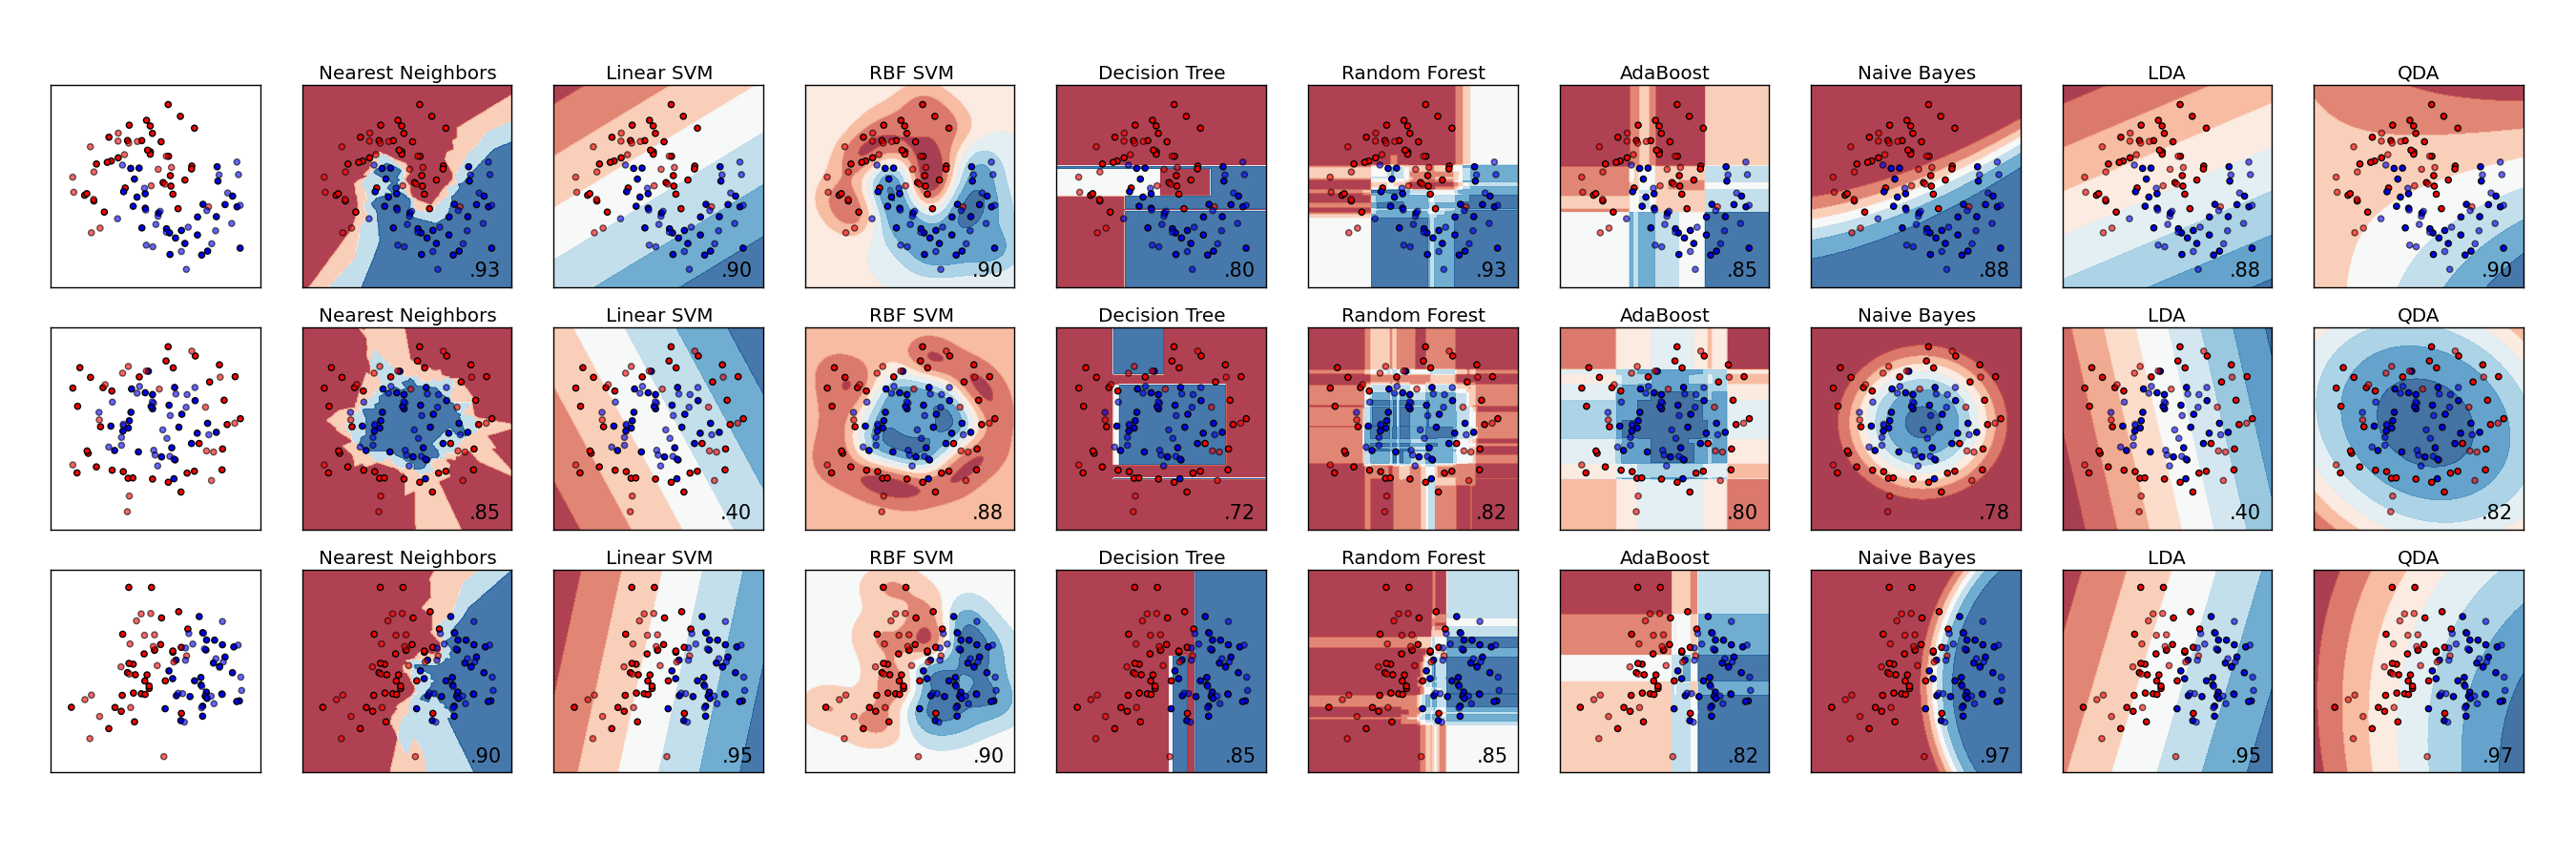

In [2]:
from IPython.core.display import Image
Image("http://scikit-learn.org/stable/_images/plot_classifier_comparison_001.png", width=1000)

Un exemple fréquemment utilisé pour illustrer la difficulté du problème est celui de deux cercles concentriques (seconde ligne).

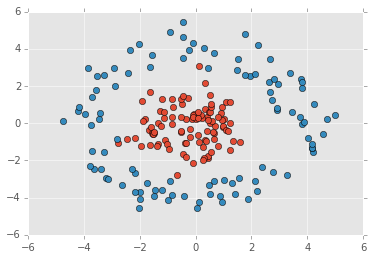

In [3]:
X1 = [ (random.gauss(0,1), random.gauss(0,1)) for i in range(0,100) ]
X2 = [ (random.gauss(4,0.5), random.random() * 2 * math.pi) for i in range(0,100) ]
X2 = [ (x[0]*math.cos(x[1]), x[0]*math.sin(x[1])) for x in X2 ]
Y1 = [ 0 for i in X1 ]
Y2 = [ 1 for i in X2 ]

plt.plot( [ x[0] for x in X1], [ x[1] for x in X1 ], "o")
plt.plot( [ x[0] for x in X2], [ x[1] for x in X2 ], "o")

On applique un modèle linéaire simple : la régression logistique (assez semblable au modèle LDA=Linear Discriminant Analysis).

In [4]:
X = numpy.array( X1 + X2 )
Y = numpy.array( Y1 + Y2 )

In [5]:
import sklearn
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

La séparation opérée par le modèle est loin d'être optimale.

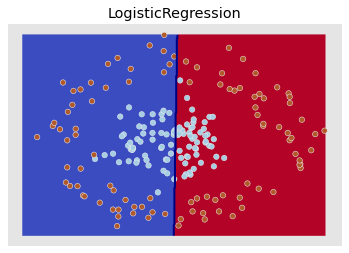

In [6]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_clf_2classes(clf, X, y, title):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max()
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max()

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.close('all')
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
               aspect='auto', origin='lower', cmap=plt.cm.coolwarm)
    
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plot_clf_2classes(clr, X, Y, "LogisticRegression")

On passe alors à un modèle toujours simple mais plus long à entraîner les plus proches voisins.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clr = KNeighborsClassifier()
clr.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=5, p=2, weights='uniform')

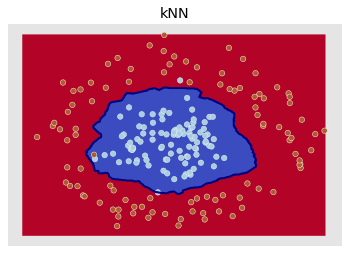

In [8]:
plot_clf_2classes(clr, X, Y, "kNN")

C'est nettement mieux mais le modèle n'est plus aussi interprétable que le précédent, il est nettement plus long à calculer. Plus la frontière entre les classes est grande, plus il faut d'exemples dans la base d'apprentissage. Les autres modèles (arbre de décision, réseaux de neurones) proposent des séparations plus ou moins proches de la solution optimale. Le modèle SVC fonctionne bien sur ce problème.

In [9]:
from sklearn.svm import SVC
clr = SVC()
clr.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

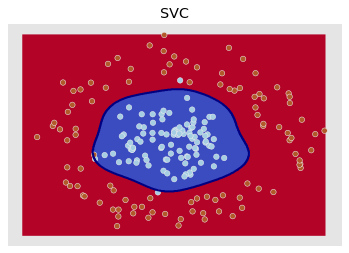

In [10]:
plot_clf_2classes(clr, X, Y, "SVC")

Cette approche est quelque peu séduisante. Elle donne l'impression qu'il suffit de parcourir la liste des modèles disponibles pour trouver celui qui convient le mieux. Sur un problème aussi simple et petit, cela ne pose pas de problème. Un très grand nombre d'observations réduit considérablement de choix. Les plus proches ou les SVM sont peu recommandés dans ce cas. Le nombre de variables ou features peut devenir un obstacle : en grande dimension, les algorithmes d'optimisation converge moins bien.

Lorsque plus rien ne marche, il faut revenir aux données et essayer de comprendre pourquoi les modèles n'arrivent pas à _capturer_ l'information. On cherche alors à construire une combinaison non linéaire des variables initiales. Dans notre cas, il suffit d'ajouter les produits des variables initiales pour se ramener à un problème de classification linéaire : $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1 x_2$.

In [11]:
Xext = numpy.zeros( (len(X), 5) )
Xext[:,:2] = X
Xext[:,2] =  X[:,0]**2
Xext[:,3] =  X[:,1]**2
Xext[:,4] =  X[:,0]*X[:,1]

In [12]:
clr = LogisticRegression()
clr.fit(Xext,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [13]:
clr.coef_

array([[ 0.458776  ,  0.01934891,  0.6741787 ,  0.55244077, -0.00203187]])

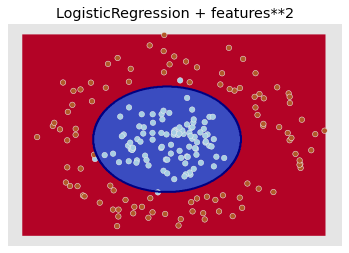

In [14]:
def plot_clf_2classes(clf, X, y, title):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max()
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max()

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), (xx*xx).ravel(), (yy*yy).ravel(), (xx*yy).ravel()])
    Z = Z.reshape(xx.shape)

    plt.close('all')
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
               aspect='auto', origin='lower', cmap=plt.cm.coolwarm)
    
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plot_clf_2classes(clr, Xext, Y, "LogisticRegression + features**2")

Un problème qui n'était pas linéaire l'est devenu en ajoutant les bonnes features. 